In [143]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [144]:
def extract_features(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    stft = np.abs(librosa.stft(y))

    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40), axis=1)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T,axis=0)
    features = np.hstack([mfccs, chroma, mel])

    return features

In [145]:
def load_data(root_directory):
    features, labels = [], []

    emotions = ['sad', 'happy']

    for emotion in emotions:
        emotion_dir = os.path.join(root_directory, emotion)
        for filename in os.listdir(emotion_dir):
            if filename.endswith(".wav"):
                audio_path = os.path.join(emotion_dir, filename)
                feature = extract_features(audio_path)
                features.append(feature)
                labels.append(emotion)

    return np.array(features), np.array(labels)

In [149]:
root_directory = "./dataset"

# Carregando dados
features, labels = load_data(root_directory)

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Padronizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/home/jomk/Documents/Joao/IA/audio-emotion-classifier/.venv/lib/python3.11/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [147]:
# Treinando o modelo SVM
model_svm = SVC(kernel='rbf', C=2, probability=True, random_state=42)
model_svm.fit(X_train, y_train)

# Inicializando e treinando o modelo RandomForest
model_rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=30, random_state=42)
model_rf.fit(X_train, y_train)

# Inicializando e treinando o modelo k-Nearest Neighbors (KNN)
model_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
model_knn.fit(X_train, y_train)

# Inicializando e treinando o modelo MLP
model_mlp = MLPClassifier(hidden_layer_sizes=(500,500), max_iter=1000, solver='adam', random_state=42)
model_mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(500, 500), max_iter=1000, random_state=42)

Acurácia SVM: 0.8883116883116883
Relatório de Classificação SVM:
              precision    recall  f1-score   support

       happy       0.90      0.87      0.88       367
         sad       0.88      0.91      0.89       403

    accuracy                           0.89       770
   macro avg       0.89      0.89      0.89       770
weighted avg       0.89      0.89      0.89       770

Matriz de Confusão SVM:


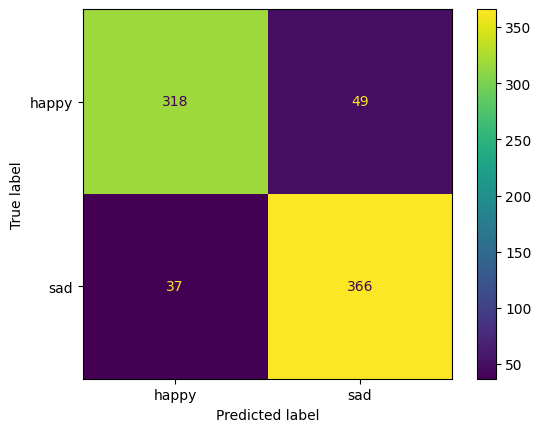

Acurácia RF: 0.887012987012987
Relatório de Classificação RF:
              precision    recall  f1-score   support

       happy       0.91      0.85      0.88       367
         sad       0.87      0.92      0.90       403

    accuracy                           0.89       770
   macro avg       0.89      0.89      0.89       770
weighted avg       0.89      0.89      0.89       770

Matriz de Confusão RF:


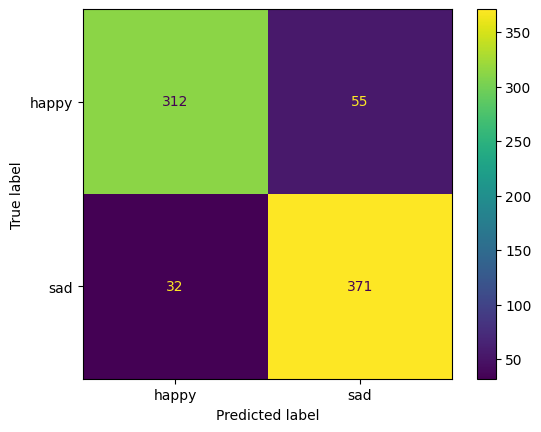

Acurácia KNN: 0.8558441558441559
Relatório de Classificação KNN:
              precision    recall  f1-score   support

       happy       0.91      0.78      0.84       367
         sad       0.82      0.93      0.87       403

    accuracy                           0.86       770
   macro avg       0.86      0.85      0.85       770
weighted avg       0.86      0.86      0.85       770

Matriz de Confusão KNN:


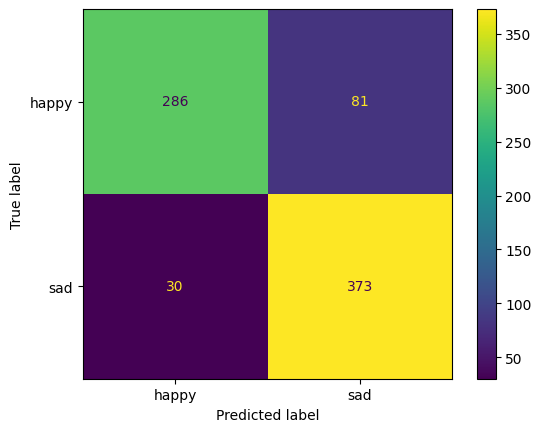

Acurácia MLP: 0.9077922077922078
Relatório de Classificação MLP:
              precision    recall  f1-score   support

       happy       0.89      0.92      0.90       367
         sad       0.92      0.90      0.91       403

    accuracy                           0.91       770
   macro avg       0.91      0.91      0.91       770
weighted avg       0.91      0.91      0.91       770

Matriz de Confusão MLP:


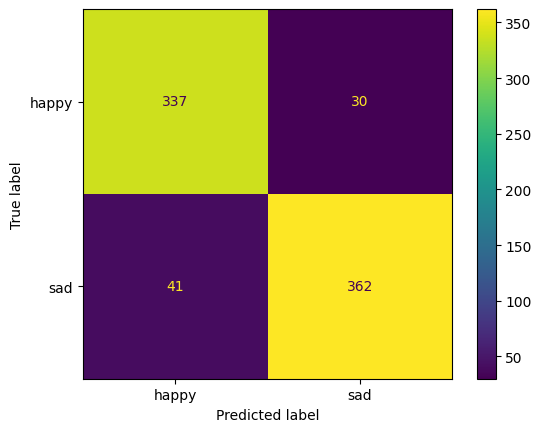

In [166]:
# Fazendo previsões
predictions_svm = model_svm.predict(X_test)

predictions_rf = model_rf.predict(X_test)

predictions_knn = model_knn.predict(X_test)

predictions_mlp = model_mlp.predict(X_test)

# Avaliando o desempenho
accuracy_svm = accuracy_score(y_test, predictions_svm)
report_svm = classification_report(y_test, predictions_svm)
conf_matrix_svm = confusion_matrix(y_test, predictions_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=model_svm.classes_).plot()

print(f"Acurácia SVM: {accuracy_svm}")
print("Relatório de Classificação SVM:")
print(report_svm)
print("Matriz de Confusão SVM:")
plt.show()

accuracy_rf = accuracy_score(y_test, predictions_rf)
report_rf = classification_report(y_test, predictions_rf)
conf_matrix_rf = confusion_matrix(y_test, predictions_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=model_rf.classes_).plot()

print(f"Acurácia RF: {accuracy_rf}")
print("Relatório de Classificação RF:")
print(report_rf)
print("Matriz de Confusão RF:")
plt.show()

accuracy_knn = accuracy_score(y_test, predictions_knn)
report_knn = classification_report(y_test, predictions_knn)
conf_matrix_knn = confusion_matrix(y_test, predictions_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=model_knn.classes_).plot()

print(f"Acurácia KNN: {accuracy_knn}")
print("Relatório de Classificação KNN:")
print(report_knn)
print("Matriz de Confusão KNN:")
plt.show()

accuracy_mlp = accuracy_score(y_test, predictions_mlp)
report_mlp = classification_report(y_test, predictions_mlp)
conf_matrix_mlp = confusion_matrix(y_test, predictions_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_mlp, display_labels=model_mlp.classes_).plot()

print(f"Acurácia MLP: {accuracy_mlp}")
print("Relatório de Classificação MLP:")
print(report_mlp)
print("Matriz de Confusão MLP:")
plt.show()
